In [1]:
!pip install pyspark

In [2]:
import numpy as np
import pandas as pd
from pyspark.sql import SparkSession


### pyspark session

In [3]:
spark = SparkSession.builder.appName("NadaAPP").config("spark.memory.offHeap.enabled","true").config("spark.memory.offHeap.size","10g").getOrCreate()

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
df = spark.read.csv('/content/drive/MyDrive/finalyear_eng/spark/ecommerce.csv', header=True, escape="\"")

In [8]:
df.show(5)

+---------+---------+--------------------+--------+------------+---------+----------+--------------+
|InvoiceNo|StockCode|         Description|Quantity| InvoiceDate|UnitPrice|CustomerID|       Country|
+---------+---------+--------------------+--------+------------+---------+----------+--------------+
|   536365|   85123A|WHITE HANGING HEA...|       6|12/1/10 8:26|     2.55|     17850|United Kingdom|
|   536365|    71053| WHITE METAL LANTERN|       6|12/1/10 8:26|     3.39|     17850|United Kingdom|
|   536365|   84406B|CREAM CUPID HEART...|       8|12/1/10 8:26|     2.75|     17850|United Kingdom|
|   536365|   84029G|KNITTED UNION FLA...|       6|12/1/10 8:26|     3.39|     17850|United Kingdom|
|   536365|   84029E|RED WOOLLY HOTTIE...|       6|12/1/10 8:26|     3.39|     17850|United Kingdom|
+---------+---------+--------------------+--------+------------+---------+----------+--------------+
only showing top 5 rows



In [9]:
df.describe().show()

+-------+-----------------+------------------+--------------------+------------------+-------------+------------------+------------------+--------------+
|summary|        InvoiceNo|         StockCode|         Description|          Quantity|  InvoiceDate|         UnitPrice|        CustomerID|       Country|
+-------+-----------------+------------------+--------------------+------------------+-------------+------------------+------------------+--------------+
|  count|             6250|              6250|                6250|              6250|         6250|              6250|              6250|          6250|
|   mean|536647.1371150729|28317.307538237437|                NULL|           8.26192|         NULL| 4.260302400000013|15866.708547407754|          NULL|
| stddev|154.5143322743332|18054.465841089295|                NULL|129.78080554192744|         NULL|17.911911509841264|1752.1682121447004|          NULL|
|    min|           536365|             10002|"ACRYLIC JEWEL IC...|         

In [10]:
df.count()

6250

In [11]:
df.groupBy('CustomerID').count().distinct().show()

+----------+-----+
|CustomerID|count|
+----------+-----+
|     16250|   14|
|     15574|  121|
|     17757|   23|
|     17855|   17|
|     15107|    5|
|     14443|    3|
|     14236|    3|
|     15100|    1|
|     13065|   14|
|     16510|   13|
|     13520|    6|
|     12838|   59|
|     15350|    5|
|     12472|   14|
|     15235|    5|
|     15544|   26|
|     12967|   15|
|     15012|   54|
|     17961|   29|
|     17976|   65|
+----------+-----+
only showing top 20 rows



### Top countries

In [12]:
df.groupBy('Country').count().show()

+--------------+-----+
|       Country|count|
+--------------+-----+
|       Germany|   51|
|        France|   27|
|          EIRE|   24|
|        Norway|   73|
|   Switzerland|    6|
|     Australia|   14|
|United Kingdom| 6053|
|   Netherlands|    2|
+--------------+-----+



### the resulting data in order of purchases.


In [13]:
df.orderBy('Quantity').show()

+---------+---------+--------------------+--------+-------------+---------+----------+--------------+
|InvoiceNo|StockCode|         Description|Quantity|  InvoiceDate|UnitPrice|CustomerID|       Country|
+---------+---------+--------------------+--------+-------------+---------+----------+--------------+
|  C536642|    21463| MIRRORED DISCO BALL|      -1|12/2/10 11:56|     5.95|     14390|United Kingdom|
|  C536817|    71477|COLOUR GLASS. STA...|      -1|12/2/10 17:08|     3.25|     14156|          EIRE|
|  C536734|    85048|15CM CHRISTMAS GL...|      -1|12/2/10 12:50|     7.95|     16042|United Kingdom|
|  C536383|   35004C|SET OF 3 COLOURED...|      -1| 12/1/10 9:49|     4.65|     15311|United Kingdom|
|  C536760|    22175|   PINK OWL SOFT TOY|      -1|12/2/10 14:29|     2.95|     17547|United Kingdom|
|  C536817|    22187|GREEN CHRISTMAS T...|      -1|12/2/10 17:08|     4.25|     14156|          EIRE|
|  C536807|    22778|  GLASS CLOCHE SMALL|      -1|12/2/10 16:45|     3.95|     15

### last purshase

In [14]:
from pyspark.sql.functions import  *

In [15]:
df.select(max('InvoiceDate')).show()

+----------------+
|max(InvoiceDate)|
+----------------+
|    12/3/10 9:51|
+----------------+



### First Purchase

In [16]:
from pyspark.sql.functions import  min

In [17]:
date_min = df.select(min('InvoiceDate')).show()

+----------------+
|min(InvoiceDate)|
+----------------+
|   12/1/10 10:03|
+----------------+



# II. Data preprocessing

In [18]:
df.show(25)

+---------+---------+--------------------+--------+------------+---------+----------+--------------+
|InvoiceNo|StockCode|         Description|Quantity| InvoiceDate|UnitPrice|CustomerID|       Country|
+---------+---------+--------------------+--------+------------+---------+----------+--------------+
|   536365|   85123A|WHITE HANGING HEA...|       6|12/1/10 8:26|     2.55|     17850|United Kingdom|
|   536365|    71053| WHITE METAL LANTERN|       6|12/1/10 8:26|     3.39|     17850|United Kingdom|
|   536365|   84406B|CREAM CUPID HEART...|       8|12/1/10 8:26|     2.75|     17850|United Kingdom|
|   536365|   84029G|KNITTED UNION FLA...|       6|12/1/10 8:26|     3.39|     17850|United Kingdom|
|   536365|   84029E|RED WOOLLY HOTTIE...|       6|12/1/10 8:26|     3.39|     17850|United Kingdom|
|   536365|    22752|SET 7 BABUSHKA NE...|       2|12/1/10 8:26|     7.65|     17850|United Kingdom|
|   536365|    21730|GLASS STAR FROSTE...|       6|12/1/10 8:26|     4.25|     17850|United

### Recence

In [19]:
from pyspark.sql.functions import*
from pyspark.sql.types import*

In [20]:
spark.sql("set spark.sql.legacy.timeParserPolicy=LEGACY")
df = df.withColumn('date', to_timestamp("InvoiceDate", 'yy/MM/dd HH:mm'))
df.select(max('date')).show()

+-------------------+
|          max(date)|
+-------------------+
|2012-03-10 11:36:00|
+-------------------+



In [21]:
df = df.withColumn('from_date', lit("12/1/10 10:03"))
df = df.withColumn('from_date', to_timestamp(df.from_date, 'yy/MM/dd HH:mm'))
df2 = df.withColumn('recency',(col('from_date')).cast("long") - (col('date')).cast("long"))


In [22]:
from pyspark.sql.functions import max
df2 = df2.join(df2.groupBy('CustomerID').agg(max('recency').alias('recency')), on=['recency'], how='leftsemi')

In [23]:
df2.show(30,0)

+-------+---------+---------+-----------------------------------+--------+------------+---------+----------+--------------+-------------------+-------------------+
|recency|InvoiceNo|StockCode|Description                        |Quantity|InvoiceDate |UnitPrice|CustomerID|Country       |date               |from_date          |
+-------+---------+---------+-----------------------------------+--------+------------+---------+----------+--------------+-------------------+-------------------+
|5820   |536365   |85123A   |WHITE HANGING HEART T-LIGHT HOLDER |6       |12/1/10 8:26|2.55     |17850     |United Kingdom|2012-01-10 08:26:00|2012-01-10 10:03:00|
|5820   |536365   |71053    |WHITE METAL LANTERN                |6       |12/1/10 8:26|3.39     |17850     |United Kingdom|2012-01-10 08:26:00|2012-01-10 10:03:00|
|5820   |536365   |84406B   |CREAM CUPID HEARTS COAT HANGER     |8       |12/1/10 8:26|2.75     |17850     |United Kingdom|2012-01-10 08:26:00|2012-01-10 10:03:00|
|5820   |536365 

In [24]:
df2.select(max('recency')).show()

+------------+
|max(recency)|
+------------+
|        5820|
+------------+



### Frequency

In [25]:
df_freq = df2.groupBy('CustomerID').agg(count('InvoiceDate').alias('frequency'))

In [26]:
df_freq.show()

+----------+---------+
|CustomerID|frequency|
+----------+---------+
|     16250|       14|
|     15574|      121|
|     17757|       23|
|     17855|       17|
|     15107|        5|
|     14443|        2|
|     14236|        3|
|     15100|        1|
|     13065|       14|
|     16510|       13|
|     13520|        6|
|     12838|       59|
|     15350|        5|
|     12472|       14|
|     15235|        5|
|     15544|       26|
|     12967|       15|
|     15012|       54|
|     17961|       29|
|     17976|       65|
+----------+---------+
only showing top 20 rows



In [27]:
df3 = df2.join(df_freq, on='CustomerID', how='inner')

In [28]:
df3.show(5)

+----------+-------+---------+---------+--------------------+--------+------------+---------+--------------+-------------------+-------------------+---------+
|CustomerID|recency|InvoiceNo|StockCode|         Description|Quantity| InvoiceDate|UnitPrice|       Country|               date|          from_date|frequency|
+----------+-------+---------+---------+--------------------+--------+------------+---------+--------------+-------------------+-------------------+---------+
|     17850|   5820|   536365|   85123A|WHITE HANGING HEA...|       6|12/1/10 8:26|     2.55|United Kingdom|2012-01-10 08:26:00|2012-01-10 10:03:00|       60|
|     17850|   5820|   536365|    71053| WHITE METAL LANTERN|       6|12/1/10 8:26|     3.39|United Kingdom|2012-01-10 08:26:00|2012-01-10 10:03:00|       60|
|     17850|   5820|   536365|   84406B|CREAM CUPID HEART...|       8|12/1/10 8:26|     2.75|United Kingdom|2012-01-10 08:26:00|2012-01-10 10:03:00|       60|
|     17850|   5820|   536365|   84029G|KNITTE

### Monetary

In [29]:
m_val = df3.withColumn('TotalAmount',col('UnitPrice')*col('Quantity'))

In [30]:
m_val = m_val.groupBy('CustomerID').agg(sum('TotalAmount').alias('moneytaru_value'))

In [31]:
finaldf = m_val.join(df3,on='CustomerID',how='inner')

In [32]:
finaldf.show(5,0)

+----------+------------------+-------+---------+---------+-----------------------------------+--------+------------+---------+--------------+-------------------+-------------------+---------+
|CustomerID|moneytaru_value   |recency|InvoiceNo|StockCode|Description                        |Quantity|InvoiceDate |UnitPrice|Country       |date               |from_date          |frequency|
+----------+------------------+-------+---------+---------+-----------------------------------+--------+------------+---------+--------------+-------------------+-------------------+---------+
|17850     |1026.5000000000002|5820   |536365   |85123A   |WHITE HANGING HEART T-LIGHT HOLDER |6       |12/1/10 8:26|2.55     |United Kingdom|2012-01-10 08:26:00|2012-01-10 10:03:00|60       |
|17850     |1026.5000000000002|5820   |536365   |71053    |WHITE METAL LANTERN                |6       |12/1/10 8:26|3.39     |United Kingdom|2012-01-10 08:26:00|2012-01-10 10:03:00|60       |
|17850     |1026.5000000000002|5820

### standarisation

In [33]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import StandardScaler
assemble=VectorAssembler(inputCols=[
'recency','frequency','moneytaru_value'
], outputCol='features')
assembled_data=assemble.transform(finaldf)
scale=StandardScaler(inputCol='features',outputCol='standardized')
data_scale=scale.fit(assembled_data)
data_scale_output=data_scale.transform(assembled_data)

# Model Construction

In [34]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
import numpy as np

cost = np.zeros(10)

evaluator = ClusteringEvaluator(predictionCol='prediction',featuresCol='standardized',metricName='silhouette',distanceMeasure='squaredEuclidean')
for i in range(2,10):
  KMeans_algo=KMeans(featuresCol='standardized', k=i)
  KMeans_fit=KMeans_algo.fit(data_scale_output)
  output=KMeans_fit.transform(data_scale_output)
  cost[i] = KMeans_fit.summary.trainingCost

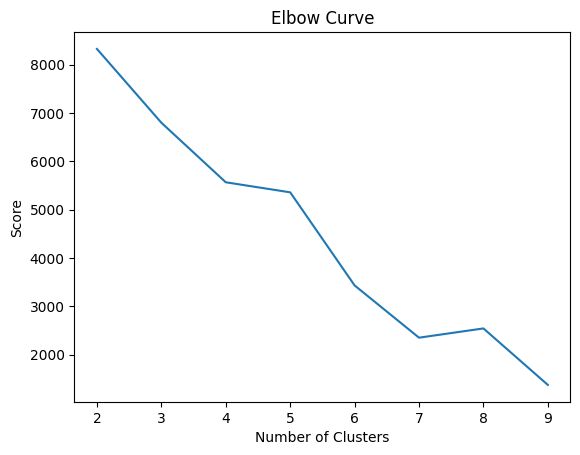

In [35]:
import pandas as pd
import pylab as pl
df_cost = pd.DataFrame(cost[2:])
df_cost.columns = ["cost"]
new_col = range(2,10)
df_cost.insert(0, 'cluster', new_col)
pl.plot(df_cost.cluster, df_cost.cost)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In [36]:
kmeans = KMeans(featuresCol='standardized', k=4)
kmeans_model = kmeans.fit(data_scale_output)

In [37]:
predictions = kmeans_model.transform(data_scale_output)
predictions.select('prediction').distinct().show(100)

+----------+
|prediction|
+----------+
|         1|
|         3|
|         2|
|         0|
+----------+



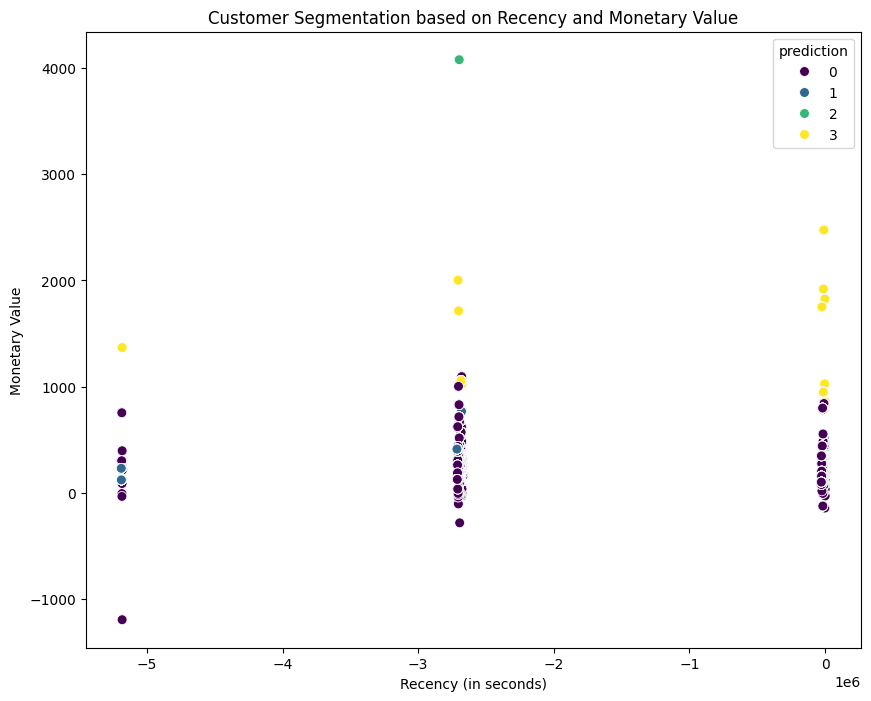

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert Spark DataFrame to Pandas DataFrame for visualization
predictions_pd = predictions.toPandas()

# Create scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x='recency', y='moneytaru_value', hue='prediction', data=predictions_pd, palette='viridis', s=50)
plt.title('Customer Segmentation based on Recency and Monetary Value')
plt.xlabel('Recency (in seconds)')
plt.ylabel('Monetary Value')
plt.show()

**Reasoning**:
Compute the mean of recency, frequency, and monetary value for each cluster by grouping the predictions DataFrame by the 'prediction' column and calculating the mean for the specified columns.



In [39]:
from pyspark.sql.functions import mean

cluster_centers_df = predictions.groupBy('prediction').agg(
    mean('recency').alias('avg_recency'),
    mean('frequency').alias('avg_frequency'),
    mean('moneytaru_value').alias('avg_moneytaru_value')
)

**Reasoning**:
Display the cluster centers DataFrame to verify the calculated means for each cluster.



In [40]:
cluster_centers_df.show()

+----------+-------------------+------------------+-------------------+
|prediction|        avg_recency|     avg_frequency|avg_moneytaru_value|
+----------+-------------------+------------------+-------------------+
|         1|-1566939.2504258943|  69.8756388415673| 338.30848381601436|
|         3| -948379.5348837209|46.405684754521964|  1337.712997416023|
|         2|         -2697360.0|              38.0| 4076.4800000000005|
|         0|  -1677444.98630137| 18.57351598173516|  316.9266438356191|
+----------+-------------------+------------------+-------------------+



**Reasoning**:
Convert the Spark DataFrame `cluster_centers_df` to a Pandas DataFrame for visualization and then create bar plots for average recency, frequency, and monetary value for each cluster.



/tmp/ipython-input-3295631201.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='prediction', y='avg_recency', data=cluster_centers_pd, palette='viridis')


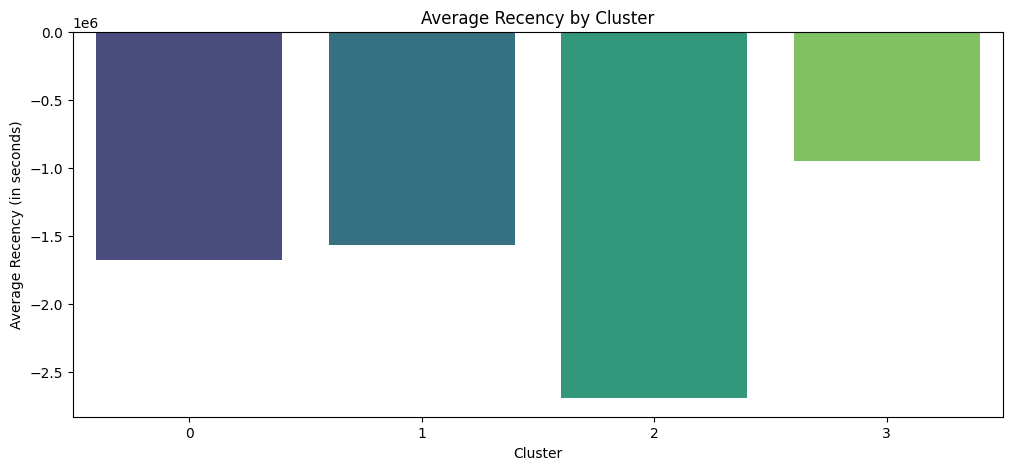

/tmp/ipython-input-3295631201.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='prediction', y='avg_frequency', data=cluster_centers_pd, palette='viridis')


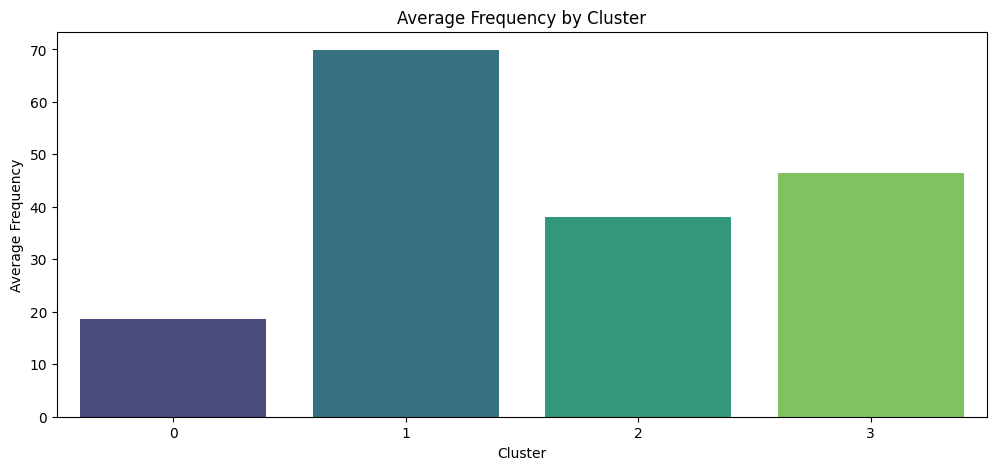

/tmp/ipython-input-3295631201.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='prediction', y='avg_moneytaru_value', data=cluster_centers_pd, palette='viridis')


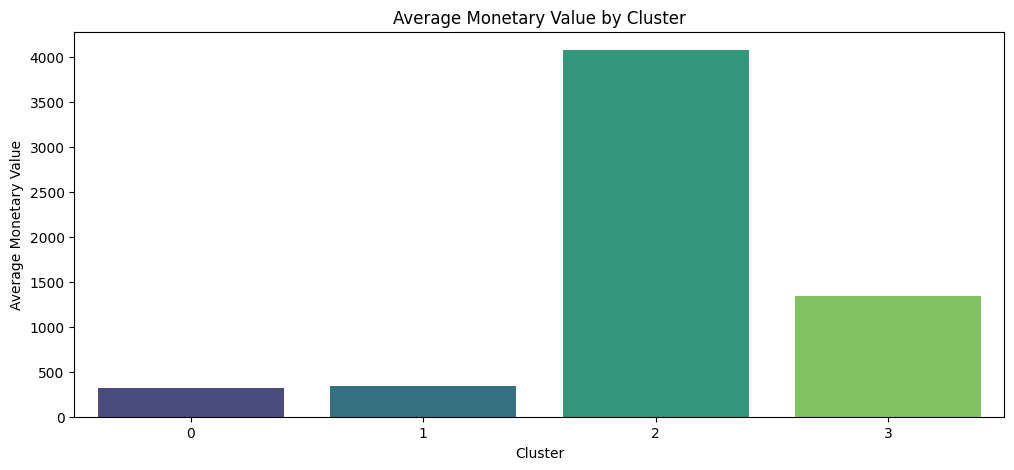

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert Spark DataFrame to Pandas DataFrame for visualization
cluster_centers_pd = cluster_centers_df.toPandas()

# Sort by prediction for consistent plotting order
cluster_centers_pd = cluster_centers_pd.sort_values('prediction')

# Create bar plot for average recency
plt.figure(figsize=(12, 5))
sns.barplot(x='prediction', y='avg_recency', data=cluster_centers_pd, palette='viridis')
plt.title('Average Recency by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Recency (in seconds)')
plt.show()

# Create bar plot for average frequency
plt.figure(figsize=(12, 5))
sns.barplot(x='prediction', y='avg_frequency', data=cluster_centers_pd, palette='viridis')
plt.title('Average Frequency by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Frequency')
plt.show()

# Create bar plot for average monetary value
plt.figure(figsize=(12, 5))
sns.barplot(x='prediction', y='avg_moneytaru_value', data=cluster_centers_pd, palette='viridis')
plt.title('Average Monetary Value by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Monetary Value')
plt.show()

## Summary:

### Data Analysis Key Findings

*   The analysis identified four distinct clusters (0, 1, 2, and 3) based on recency, frequency, and monetary value.
*   Cluster 0 is characterized by a relatively high average recency, low average frequency, and low average monetary value.
*   Cluster 1 exhibits a low average recency, high average frequency, and high average monetary value, indicating recent, frequent, and high-spending customers.
*   Cluster 2 shows a high average recency, low average frequency, and moderate average monetary value.
*   Cluster 3 has a moderate average recency, moderate average frequency, and low average monetary value.
